# Project Aim: To predict the mortgage backed securities prepayment risk using machine learning models

This project will provide a predictive model that can help mortgage lenders and servicers to identify prepayment-risk of loans.

### A. Problem statement understanding :

1. A mortgage-backed security (MBS) is an investment secured by a collection of mortgages bought by the banks that issued them. Mortgage-backed securities are bought and sold on the secondary market in other words MBS is a type of asset-backed security collateralised by a pool of mortgages. This essentially represents transfer of credit risk from a primary lender, typically the originating bank, to an investment bank.

2. Prepayment risk is the risk involved with the premature return of principal on a fixed-income security. When prepayment occurs, investors must reinvest at current market interest rates, which are usually substantially lower. Prepayment risk mostly affects corporate bonds and mortgage-backed securities (MBS). Prepayment is a risk for mortgage lenders and mortgage-backed securities (MBS) investors that people will pay their loans off earlier than the full term. This prevents them from getting interest payments for the long amount of time as they'd counted on.

### B. Data undrstanding:
For study purpose we have the Freddie Mac dataset. It is one of the largest mortgage financing companies in the United States.
It consist of 291451 number of rows and 28 columns.

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from datetime import datetime
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import r2_score as R2
from sklearn.model_selection  import cross_val_score as CVS
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
df=pd.read_csv('loan_export.csv')
df.head()

C:\Users\hp\AppData\Local\Temp\ipykernel_16004\3650652723.py:1: DtypeWarning: Columns (18) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('loan_export.csv')


,CreditScore,FirstPaymentDate,FirstTimeHomebuyer,MaturityDate,MSA,MIP,Units,Occupancy,OCLTV,DTI,...,PostalCode,LoanSeqNum,LoanPurpose,OrigLoanTerm,NumBorrowers,SellerName,ServicerName,EverDelinquent,MonthsDelinquent,MonthsInRepayment
0,0,199902,N,202901,16974,25,1,O,89,27,...,60400,F199Q1268030,P,360,2,FL,WASHINGTONMUTUALBANK,0,0,52
1,0,199902,N,202901,19740,0,1,O,73,17,...,80200,F199Q1015092,N,360,1,FT,CHASEHOMEFINANCELLC,0,0,144
2,0,199902,N,202901,29940,0,1,O,75,16,...,66000,F199Q1266886,N,360,2,FL,WASHINGTONMUTUALBANK,0,0,67
3,0,199902,N,202901,31084,0,1,O,76,14,...,90700,F199Q1178167,N,360,2,GM,GMACMTGECORP,0,0,35
4,0,199902,N,202901,35644,0,1,O,78,18,...,7600,F199Q1178517,N,360,2,GM,GMACMTGECORP,0,0,54


In [3]:
df.head()

,CreditScore,FirstPaymentDate,FirstTimeHomebuyer,MaturityDate,MSA,MIP,Units,Occupancy,OCLTV,DTI,...,PostalCode,LoanSeqNum,LoanPurpose,OrigLoanTerm,NumBorrowers,SellerName,ServicerName,EverDelinquent,MonthsDelinquent,MonthsInRepayment
0,0,199902,N,202901,16974,25,1,O,89,27,...,60400,F199Q1268030,P,360,2,FL,WASHINGTONMUTUALBANK,0,0,52
1,0,199902,N,202901,19740,0,1,O,73,17,...,80200,F199Q1015092,N,360,1,FT,CHASEHOMEFINANCELLC,0,0,144
2,0,199902,N,202901,29940,0,1,O,75,16,...,66000,F199Q1266886,N,360,2,FL,WASHINGTONMUTUALBANK,0,0,67
3,0,199902,N,202901,31084,0,1,O,76,14,...,90700,F199Q1178167,N,360,2,GM,GMACMTGECORP,0,0,35
4,0,199902,N,202901,35644,0,1,O,78,18,...,7600,F199Q1178517,N,360,2,GM,GMACMTGECORP,0,0,54


# DATA CLEANING

In [4]:
len(df['SellerName'].unique())

21

In [5]:
for i in df.columns:
    print(len(df[i].unique()))

370
66
3
96
392
37
5
3
102
66
375
97
254
4
3
1
53
7
892
291451
3
61
3
21
20
2
174
212


In [6]:
df['SellerName'].value_counts()

Ot    76943
CO    34479
FL    25573
FI    24581
ST    22243
NO    16184
OL     7776
PR     7365
BA     7093
GM     6566
BI     6407
G      4734
CH     4599
CR     4459
FT     4105
WA     3139
AC     3076
HO     2970
PN     2407
RE     1758
Name: SellerName, dtype: int64

In [7]:
 df.SellerName.value_counts().sort_values(ascending=False)

Ot    76943
CO    34479
FL    25573
FI    24581
ST    22243
NO    16184
OL     7776
PR     7365
BA     7093
GM     6566
BI     6407
G      4734
CH     4599
CR     4459
FT     4105
WA     3139
AC     3076
HO     2970
PN     2407
RE     1758
Name: SellerName, dtype: int64

In [8]:
df["SellerName"].isnull().sum()

24994

In [9]:
print(" Mode Value \n",[df['SellerName'].mode().values[0]])

 Mode Value 
 ['Ot']


In [10]:
df['SellerName'] = df['SellerName'].fillna(df['SellerName'].dropna().mode().values[0])


In [11]:
df['SellerName'].isnull().sum()

0

In [12]:
df.FirstTimeHomebuyer.shape

(291451,)

In [13]:
df['FirstTimeHomebuyer'].value_counts()

N    184154
X     78015
Y     29282
Name: FirstTimeHomebuyer, dtype: int64

In [14]:
df['FirstTimeHomebuyer'].sort_values()

0         N
173805    N
173806    N
173807    N
173808    N
         ..
154817    Y
154816    Y
154815    Y
212120    Y
194891    Y
Name: FirstTimeHomebuyer, Length: 291451, dtype: object

In [15]:
df =  df[df["FirstTimeHomebuyer"]!= 'X']

In [16]:
df["FirstTimeHomebuyer"]

0         N
1         N
2         N
3         N
4         N
         ..
291446    N
291447    N
291448    N
291449    N
291450    N
Name: FirstTimeHomebuyer, Length: 213436, dtype: object

In [17]:
df["FirstTimeHomebuyer"].value_counts()

N    184154
Y     29282
Name: FirstTimeHomebuyer, dtype: int64

In [18]:
df.FirstTimeHomebuyer.shape

(213436,)

In [19]:
df['PPM'].value_counts()

N    204660
X      4895
Y      3881
Name: PPM, dtype: int64

In [20]:
df =df[df['PPM']!='X']

In [21]:
df['PPM'].value_counts()

N    204660
Y      3881
Name: PPM, dtype: int64

In [22]:
df.PropertyType.dtypes

dtype('O')

In [23]:
df.PropertyType.info()

<class 'pandas.core.series.Series'>
Int64Index: 208541 entries, 0 to 291450
Series name: PropertyType
Non-Null Count   Dtype 
--------------   ----- 
208541 non-null  object
dtypes: object(1)
memory usage: 3.2+ MB


In [24]:
df.PropertyType.value_counts()

SF    171892
PU     22726
CO     13325
MH       462
CP        61
LH        54
X         21
Name: PropertyType, dtype: int64

In [25]:
df =df[df['PropertyType']!='X']

In [26]:
 df=df[df["PropertyType"]!= "X"]

In [27]:
df['PropertyType'].value_counts()

SF    171892
PU     22726
CO     13325
MH       462
CP        61
LH        54
X         21
Name: PropertyType, dtype: int64

In [28]:
df.MSA.shape

(208541,)

In [29]:
df.MSA.value_counts()

X        26716
31084     7114
16974     6495
12060     5094
47644     5050
         ...  
41900        3
49500        2
10380        1
25020        1
32420        1
Name: MSA, Length: 392, dtype: int64

In [30]:
df['MSA'] = pd.to_numeric(df['MSA'], errors='coerce').fillna(0).astype(int)

In [31]:
df = df[df['MSA'] != 0]

In [32]:
df.MSA.shape

(181825,)

In [33]:
df['MSA'].value_counts()

31084    7114
16974    6495
12060    5094
47644    5050
38060    4388
         ... 
41900       3
49500       2
10380       1
25020       1
32420       1
Name: MSA, Length: 391, dtype: int64

In [34]:
df['MSA'].sort_values(ascending=False)

119448    49740
228853    49740
120551    49740
195967    49740
254829    49740
          ...  
273197    10180
223356    10180
169221    10180
87483     10180
139317    10180
Name: MSA, Length: 181825, dtype: int32

In [35]:
df.isnull().sum()

CreditScore           0
FirstPaymentDate      0
FirstTimeHomebuyer    0
MaturityDate          0
MSA                   0
MIP                   0
Units                 0
Occupancy             0
OCLTV                 0
DTI                   0
OrigUPB               0
LTV                   0
OrigInterestRate      0
Channel               0
PPM                   0
ProductType           0
PropertyState         0
PropertyType          0
PostalCode            0
LoanSeqNum            0
LoanPurpose           0
OrigLoanTerm          0
NumBorrowers          0
SellerName            0
ServicerName          0
EverDelinquent        0
MonthsDelinquent      0
MonthsInRepayment     0
dtype: int64

In [36]:
df.NumBorrowers.shape

(181825,)

In [37]:
df.NumBorrowers.dtypes

dtype('O')

In [38]:
df.NumBorrowers.value_counts()

2     115165
1      66521
X        139
Name: NumBorrowers, dtype: int64

In [39]:
df['NumBorrowers'] = pd.to_numeric(df['NumBorrowers'], errors='coerce').fillna(0).astype(int)

In [40]:
df = df[df['NumBorrowers']!= 0]

In [41]:
df.NumBorrowers.value_counts()

2    115165
1     66521
Name: NumBorrowers, dtype: int64

In [42]:
df.NumBorrowers.shape

(181686,)

In [43]:
df.NumBorrowers.dtypes

dtype('int32')

In [44]:
df.isnull().sum()

CreditScore           0
FirstPaymentDate      0
FirstTimeHomebuyer    0
MaturityDate          0
MSA                   0
MIP                   0
Units                 0
Occupancy             0
OCLTV                 0
DTI                   0
OrigUPB               0
LTV                   0
OrigInterestRate      0
Channel               0
PPM                   0
ProductType           0
PropertyState         0
PropertyType          0
PostalCode            0
LoanSeqNum            0
LoanPurpose           0
OrigLoanTerm          0
NumBorrowers          0
SellerName            0
ServicerName          0
EverDelinquent        0
MonthsDelinquent      0
MonthsInRepayment     0
dtype: int64

In [45]:
df["IsFirstTimeHomebuyer"] = df['FirstTimeHomebuyer'].map({"N":0,"Y":1})
df.head()

,CreditScore,FirstPaymentDate,FirstTimeHomebuyer,MaturityDate,MSA,MIP,Units,Occupancy,OCLTV,DTI,...,LoanSeqNum,LoanPurpose,OrigLoanTerm,NumBorrowers,SellerName,ServicerName,EverDelinquent,MonthsDelinquent,MonthsInRepayment,IsFirstTimeHomebuyer
0,0,199902,N,202901,16974,25,1,O,89,27,...,F199Q1268030,P,360,2,FL,WASHINGTONMUTUALBANK,0,0,52,0
1,0,199902,N,202901,19740,0,1,O,73,17,...,F199Q1015092,N,360,1,FT,CHASEHOMEFINANCELLC,0,0,144,0
2,0,199902,N,202901,29940,0,1,O,75,16,...,F199Q1266886,N,360,2,FL,WASHINGTONMUTUALBANK,0,0,67,0
3,0,199902,N,202901,31084,0,1,O,76,14,...,F199Q1178167,N,360,2,GM,GMACMTGECORP,0,0,35,0
4,0,199902,N,202901,35644,0,1,O,78,18,...,F199Q1178517,N,360,2,GM,GMACMTGECORP,0,0,54,0


In [46]:
df['IsFirstTimeHomebuyer'].unique()

array([0, 1], dtype=int64)

In [47]:
df['LTV_Range'] = ""
for index, value in df['LTV'].iteritems():
    if value >= 0 and value < 25:
        df.at[index, 'LTV_Range'] = 'Low'
    elif value >= 25 and value < 50:
        df.at[index, 'LTV_Range'] = 'Medium'
    elif value >= 50 and value < 75:
        df.at[index, 'LTV_Range'] = 'High'
    elif value >= 75 and value <= 100:
        df.at[index, 'LTV_Range'] = ' Very High'
    else:
        df.at[index, 'LTV_Range'] = 'Invalid value'

C:\Users\PSPL\AppData\Local\Temp\ipykernel_15392\2514742688.py:2: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for index, value in df['LTV'].iteritems():


In [48]:
df['LTV'].value_counts().index

Int64Index([ 80,  95,  90,  75,  85,  79,  97,  78,  70,  74,  77,  73,  89,
             72,  76,  69,  71,  88,  65,  67,  68,  87,  66,  64,  60,  63,
             84,  62,  56,  86,  59,  93,  57,  61,  55,  94,  50,  83,  54,
             53,  58,  92,  52,  48,  49,  51,  47,  82,  45,  46,  44,  43,
             40,  42,  39,  38,  41,  37,  91,  34,  35,  36,  30,  33,  32,
             28,  81,  31,  27,  24,  25,  26,  29,  23,  22,  96,  20,  21,
             19,  18,  17,  16,  15,  14,  13,  12,   9,  11, 100,  10,   8,
              7,  98,   6,   0],
           dtype='int64')

In [49]:
df['CreditRange'] = ""
for index, value in df['CreditScore'].iteritems():
    if value >= 0 and value < 650:
        df.at[index, 'CreditRange'] = 'Poor'
    elif value >= 650 and value < 700:
        df.at[index, 'CreditRange'] = 'Fair'
    elif value >= 700 and value < 750:
        df.at[index, 'CreditRange'] = 'Good'
    elif value >= 750 and value <= 900:
        df.at[index, 'CreditRange'] = 'Excellent'
    else:
        df.at[index, 'CreditRange'] = 'Invalid value'

C:\Users\PSPL\AppData\Local\Temp\ipykernel_15392\1718175256.py:2: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for index, value in df['CreditScore'].iteritems():


In [50]:
df['MIP'].value_counts()

0     107317
30     33430
25     26832
12      7212
18      2443
17      1660
35      1004
36       678
29       581
20       228
14       145
27        49
22        26
6         16
33        12
50         7
28         6
47         5
26         5
1          4
16         4
32         4
24         3
13         3
15         2
37         2
10         2
55         1
21         1
11         1
7          1
52         1
4          1
Name: MIP, dtype: int64

In [51]:
df['MIP'].value_counts()

0     107317
30     33430
25     26832
12      7212
18      2443
17      1660
35      1004
36       678
29       581
20       228
14       145
27        49
22        26
6         16
33        12
50         7
28         6
47         5
26         5
1          4
16         4
32         4
24         3
13         3
15         2
37         2
10         2
55         1
21         1
11         1
7          1
52         1
4          1
Name: MIP, dtype: int64

In [52]:
df['RepPayRange'] = ""
for index, value in df['MonthsInRepayment'].iteritems():
    if value >= 0 and value < 48:
        df.at[index, 'RepPayRange'] = '0-4yrs'
    elif value >= 48 and value < 96:
        df.at[index, 'RepPayRange'] = '4-8yrs'
    elif value >= 96 and value < 144:
        df.at[index, 'RepPayRange'] = '8-12yrs'
    elif value >= 144 and value < 192:
        df.at[index, 'RepPayRange'] = '12-16yrs'
    elif value >= 192 and value < 240:
        df.at[index, 'RepPayRange'] = '16-20yrs'
    else:
        df.at[index, 'RepPayRange'] = 'Invalid value'

C:\Users\PSPL\AppData\Local\Temp\ipykernel_15392\4211333018.py:2: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for index, value in df['MonthsInRepayment'].iteritems():


In [53]:
df["RepPayRange"].value_counts()

0-4yrs      89448
4-8yrs      67169
8-12yrs     11180
12-16yrs     7319
16-20yrs     6570
Name: RepPayRange, dtype: int64

In [54]:
df.head(100000)

,CreditScore,FirstPaymentDate,FirstTimeHomebuyer,MaturityDate,MSA,MIP,Units,Occupancy,OCLTV,DTI,...,NumBorrowers,SellerName,ServicerName,EverDelinquent,MonthsDelinquent,MonthsInRepayment,IsFirstTimeHomebuyer,LTV_Range,CreditRange,RepPayRange
0,0,199902,N,202901,16974,25,1,O,89,27,...,2,FL,WASHINGTONMUTUALBANK,0,0,52,0,Very High,Poor,4-8yrs
1,0,199902,N,202901,19740,0,1,O,73,17,...,1,FT,CHASEHOMEFINANCELLC,0,0,144,0,High,Poor,12-16yrs
2,0,199902,N,202901,29940,0,1,O,75,16,...,2,FL,WASHINGTONMUTUALBANK,0,0,67,0,Very High,Poor,4-8yrs
3,0,199902,N,202901,31084,0,1,O,76,14,...,2,GM,GMACMTGECORP,0,0,35,0,Very High,Poor,0-4yrs
4,0,199902,N,202901,35644,0,1,O,78,18,...,2,GM,GMACMTGECORP,0,0,54,0,Very High,Poor,4-8yrs
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161128,725,199904,Y,202903,16740,0,1,O,79,33,...,2,FI,WELLSFARGOBANKNA,0,0,73,1,Very High,Good,4-8yrs
161129,725,199904,Y,202903,16974,0,1,O,94,0,...,2,ST,ABNAMROMTGEGROUPINC,0,0,9,1,Very High,Good,0-4yrs
161130,725,199904,Y,202903,17140,30,1,O,95,36,...,1,Ot,WASHINGTONMUTUALBANK,0,0,68,1,Very High,Good,4-8yrs
161131,725,199904,Y,202903,18140,0,1,O,80,36,...,1,NO,WELLSFARGOBANKNA,0,0,142,1,Very High,Good,8-12yrs


In [55]:
# Convert the date columns to datetime format
df['FirstPaymentDate'] = pd.to_datetime(df['FirstPaymentDate'],format='%Y%m')
df['MaturityDate'] = pd.to_datetime(df['MaturityDate'], format='%Y%m')
# Calculate the difference in months
df['Month_Difference'] = (df['MaturityDate'].dt.to_period('M') - df['FirstPaymentDate'].dt.to_period('M')).apply(lambda x: x.n)

In [56]:
df["Month_Difference"].value_counts()

359    180402
353       278
335        87
358        51
347        47
        ...  
321         3
301         3
303         2
302         2
360         1
Name: Month_Difference, Length: 61, dtype: int64

In [57]:
df.head(1000)

,CreditScore,FirstPaymentDate,FirstTimeHomebuyer,MaturityDate,MSA,MIP,Units,Occupancy,OCLTV,DTI,...,SellerName,ServicerName,EverDelinquent,MonthsDelinquent,MonthsInRepayment,IsFirstTimeHomebuyer,LTV_Range,CreditRange,RepPayRange,Month_Difference
0,0,1999-02-01,N,2029-01-01,16974,25,1,O,89,27,...,FL,WASHINGTONMUTUALBANK,0,0,52,0,Very High,Poor,4-8yrs,359
1,0,1999-02-01,N,2029-01-01,19740,0,1,O,73,17,...,FT,CHASEHOMEFINANCELLC,0,0,144,0,High,Poor,12-16yrs,359
2,0,1999-02-01,N,2029-01-01,29940,0,1,O,75,16,...,FL,WASHINGTONMUTUALBANK,0,0,67,0,Very High,Poor,4-8yrs,359
3,0,1999-02-01,N,2029-01-01,31084,0,1,O,76,14,...,GM,GMACMTGECORP,0,0,35,0,Very High,Poor,0-4yrs,359
4,0,1999-02-01,N,2029-01-01,35644,0,1,O,78,18,...,GM,GMACMTGECORP,0,0,54,0,Very High,Poor,4-8yrs,359
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1597,534,1999-03-01,N,2029-02-01,43340,0,1,O,66,52,...,GM,GMACMTGECORP,1,2,75,0,High,Poor,4-8yrs,359
1602,534,1999-04-01,N,2029-03-01,16974,30,1,O,95,29,...,Ot,Other servicers,0,0,24,0,Very High,Poor,0-4yrs,359
1603,534,1999-04-01,N,2029-03-01,26620,0,1,O,75,22,...,Ot,Other servicers,0,0,20,0,Very High,Poor,0-4yrs,359
1604,534,1999-04-01,N,2029-03-01,28140,0,1,O,75,53,...,GM,GMACMTGECORP,0,0,40,0,Very High,Poor,0-4yrs,359


In [58]:
def calculate_emi(OrigUPB, OrigInterestRate, OrigLoanTerm):
    r = (OrigInterestRate / 12) / 100  # Convert annual interest rate to monthly rate
    n = OrigLoanTerm  # Total number of monthly installments
    
    emi = (OrigUPB * r * (1 + r) ** n) / ((1 + r) ** n - 1)
    return round(emi, 2)  # Round the EMI to 2 decimal places
# Calculate EMI and create a new column for EMI
df['monthly_payment'] = calculate_emi(df['OrigUPB'], df['OrigInterestRate'], df['OrigLoanTerm'])



In [59]:
df["total_payment"] = df['monthly_payment']*df["OrigLoanTerm"]
df['total_payment'] = df['total_payment'].round(2)
df["interest_amount"] = df["total_payment"]-df["OrigUPB"]
df['interest_amount'] = df['interest_amount'].round(2)

In [60]:
df["monthly_income"] = (df["monthly_payment"]//df["DTI"])* 100
df['monthly_income'] = df['monthly_income'].round(2)

In [61]:
df["monthly_rate"] = df["OrigInterestRate"]/1200
df['monthly_rate'] = df['monthly_rate'].round(4)

In [62]:
def principle(monthly_rate,OrigUPB,monthly_payment,MonthsInRepayment):
    for i in range(MonthsInRepayment):
        interest = monthly_rate*OrigUPB
        p=monthly_payment-interest
    return round (p,2)
    

df["monthly_priciple amount"] = np.vectorize(principle)(df["monthly_rate"],df["OrigUPB"],df["monthly_payment"],df["MonthsInRepayment"])

In [63]:
def principle(monthly_rate,OrigUPB,monthly_payment,MonthsInRepayment):
    remaining_principal = OrigUPB
    for i in range(MonthsInRepayment):
        interest = monthly_rate*OrigUPB
        p=monthly_payment-interest
        remaining_principal =  remaining_principal- p
    return round (remaining_principal,2)
    

df["principal_amount_remaining"] = np.vectorize(principle)(df["monthly_rate"],df["OrigUPB"],df["monthly_payment"],df["MonthsInRepayment"])

In [64]:
def principle(monthly_rate,OrigUPB,monthly_payment,MonthsInRepayment):
    remaining_principal = OrigUPB
    for i in range(MonthsInRepayment):
        interest = monthly_rate*OrigUPB
        p=monthly_payment-interest
        remaining_principal =  remaining_principal- p
        priciple_amount_paid = OrigUPB - remaining_principal
    return round (priciple_amount_paid,2)
    

df["priciple_amount_paid"] = np.vectorize(principle)(df["monthly_rate"],df["OrigUPB"],df["monthly_payment"],df["MonthsInRepayment"])

In [65]:
df

,CreditScore,FirstPaymentDate,FirstTimeHomebuyer,MaturityDate,MSA,MIP,Units,Occupancy,OCLTV,DTI,...,RepPayRange,Month_Difference,monthly_payment,total_payment,interest_amount,monthly_income,monthly_rate,monthly_priciple amount,principal_amount_remaining,priciple_amount_paid
0,0,1999-02-01,N,2029-01-01,16974,25,1,O,89,27,...,4-8yrs,359,758.86,273189.60,156189.60,2800.0,0.0056,103.66,111609.68,5390.32
1,0,1999-02-01,N,2029-01-01,19740,0,1,O,73,17,...,12-16yrs,359,688.95,248022.00,139022.00,4000.0,0.0054,100.35,94549.60,14450.40
2,0,1999-02-01,N,2029-01-01,29940,0,1,O,75,16,...,4-8yrs,359,578.10,208116.00,120116.00,3600.0,0.0057,76.50,82874.50,5125.50
3,0,1999-02-01,N,2029-01-01,31084,0,1,O,76,14,...,0-4yrs,359,1051.09,378392.40,218392.40,7500.0,0.0057,139.09,155131.85,4868.15
4,0,1999-02-01,N,2029-01-01,35644,0,1,O,78,18,...,4-8yrs,359,734.35,264366.00,155366.00,4000.0,0.0059,91.25,104072.50,4927.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291446,839,1999-03-01,N,2029-02-01,37964,0,1,O,60,32,...,0-4yrs,359,598.77,215557.20,125557.20,1800.0,0.0058,76.77,89078.76,921.24
291447,840,2002-10-01,N,2029-04-01,35644,0,1,O,73,0,...,4-8yrs,318,1739.31,554839.89,287839.89,inf,0.0053,324.21,249816.87,17183.13
291448,840,2003-04-01,N,2029-04-01,42044,0,1,O,73,31,...,0-4yrs,312,530.57,166068.41,79068.41,1700.0,0.0047,121.67,82376.54,4623.46
291449,845,1999-04-01,N,2029-03-01,37964,0,1,I,80,54,...,0-4yrs,359,585.47,210769.20,122769.20,1000.0,0.0058,75.07,85597.76,2402.24


In [66]:
def prepay(dti,income):
    if(dti<40):
        p=income/2
    else:
        p=income*3/4
    return p
df["prepayment"]=np.vectorize(prepay)(df["DTI"],df["monthly_income"]*24)
df["prepayment"]=df["prepayment"]-(df["monthly_payment"]*24)

In [67]:
df.isnull().sum()

CreditScore                   0
FirstPaymentDate              0
FirstTimeHomebuyer            0
MaturityDate                  0
MSA                           0
MIP                           0
Units                         0
Occupancy                     0
OCLTV                         0
DTI                           0
OrigUPB                       0
LTV                           0
OrigInterestRate              0
Channel                       0
PPM                           0
ProductType                   0
PropertyState                 0
PropertyType                  0
PostalCode                    0
LoanSeqNum                    0
LoanPurpose                   0
OrigLoanTerm                  0
NumBorrowers                  0
SellerName                    0
ServicerName                  0
EverDelinquent                0
MonthsDelinquent              0
MonthsInRepayment             0
IsFirstTimeHomebuyer          0
LTV_Range                     0
CreditRange                   0
RepPayRa

In [68]:
df

,CreditScore,FirstPaymentDate,FirstTimeHomebuyer,MaturityDate,MSA,MIP,Units,Occupancy,OCLTV,DTI,...,Month_Difference,monthly_payment,total_payment,interest_amount,monthly_income,monthly_rate,monthly_priciple amount,principal_amount_remaining,priciple_amount_paid,prepayment
0,0,1999-02-01,N,2029-01-01,16974,25,1,O,89,27,...,359,758.86,273189.60,156189.60,2800.0,0.0056,103.66,111609.68,5390.32,15387.36
1,0,1999-02-01,N,2029-01-01,19740,0,1,O,73,17,...,359,688.95,248022.00,139022.00,4000.0,0.0054,100.35,94549.60,14450.40,31465.20
2,0,1999-02-01,N,2029-01-01,29940,0,1,O,75,16,...,359,578.10,208116.00,120116.00,3600.0,0.0057,76.50,82874.50,5125.50,29325.60
3,0,1999-02-01,N,2029-01-01,31084,0,1,O,76,14,...,359,1051.09,378392.40,218392.40,7500.0,0.0057,139.09,155131.85,4868.15,64773.84
4,0,1999-02-01,N,2029-01-01,35644,0,1,O,78,18,...,359,734.35,264366.00,155366.00,4000.0,0.0059,91.25,104072.50,4927.50,30375.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291446,839,1999-03-01,N,2029-02-01,37964,0,1,O,60,32,...,359,598.77,215557.20,125557.20,1800.0,0.0058,76.77,89078.76,921.24,7229.52
291447,840,2002-10-01,N,2029-04-01,35644,0,1,O,73,0,...,318,1739.31,554839.89,287839.89,inf,0.0053,324.21,249816.87,17183.13,inf
291448,840,2003-04-01,N,2029-04-01,42044,0,1,O,73,31,...,312,530.57,166068.41,79068.41,1700.0,0.0047,121.67,82376.54,4623.46,7666.32
291449,845,1999-04-01,N,2029-03-01,37964,0,1,I,80,54,...,359,585.47,210769.20,122769.20,1000.0,0.0058,75.07,85597.76,2402.24,3948.72


In [69]:
df.drop(['FirstTimeHomebuyer','LTV','MonthsInRepayment',"CreditScore","FirstPaymentDate","MaturityDate"],axis=1, inplace=True)

In [70]:
df.drop(['PostalCode','LoanSeqNum',"ProductType"],axis=1, inplace=True)

In [71]:
df

,MSA,MIP,Units,Occupancy,OCLTV,DTI,OrigUPB,OrigInterestRate,Channel,PPM,...,Month_Difference,monthly_payment,total_payment,interest_amount,monthly_income,monthly_rate,monthly_priciple amount,principal_amount_remaining,priciple_amount_paid,prepayment
0,16974,25,1,O,89,27,117000,6.750,T,N,...,359,758.86,273189.60,156189.60,2800.0,0.0056,103.66,111609.68,5390.32,15387.36
1,19740,0,1,O,73,17,109000,6.500,R,N,...,359,688.95,248022.00,139022.00,4000.0,0.0054,100.35,94549.60,14450.40,31465.20
2,29940,0,1,O,75,16,88000,6.875,T,N,...,359,578.10,208116.00,120116.00,3600.0,0.0057,76.50,82874.50,5125.50,29325.60
3,31084,0,1,O,76,14,160000,6.875,R,N,...,359,1051.09,378392.40,218392.40,7500.0,0.0057,139.09,155131.85,4868.15,64773.84
4,35644,0,1,O,78,18,109000,7.125,R,N,...,359,734.35,264366.00,155366.00,4000.0,0.0059,91.25,104072.50,4927.50,30375.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291446,37964,0,1,O,60,32,90000,7.000,R,N,...,359,598.77,215557.20,125557.20,1800.0,0.0058,76.77,89078.76,921.24,7229.52
291447,35644,0,1,O,73,0,267000,6.375,C,N,...,318,1739.31,554839.89,287839.89,inf,0.0053,324.21,249816.87,17183.13,inf
291448,42044,0,1,O,73,31,87000,5.625,R,N,...,312,530.57,166068.41,79068.41,1700.0,0.0047,121.67,82376.54,4623.46,7666.32
291449,37964,0,1,I,80,54,88000,7.000,R,N,...,359,585.47,210769.20,122769.20,1000.0,0.0058,75.07,85597.76,2402.24,3948.72


In [72]:
df.head()

,MSA,MIP,Units,Occupancy,OCLTV,DTI,OrigUPB,OrigInterestRate,Channel,PPM,...,Month_Difference,monthly_payment,total_payment,interest_amount,monthly_income,monthly_rate,monthly_priciple amount,principal_amount_remaining,priciple_amount_paid,prepayment
0,16974,25,1,O,89,27,117000,6.750,T,N,...,359,758.86,273189.6,156189.6,2800.0,0.0056,103.66,111609.68,5390.32,15387.36
1,19740,0,1,O,73,17,109000,6.500,R,N,...,359,688.95,248022.0,139022.0,4000.0,0.0054,100.35,94549.60,14450.40,31465.20
2,29940,0,1,O,75,16,88000,6.875,T,N,...,359,578.10,208116.0,120116.0,3600.0,0.0057,76.50,82874.50,5125.50,29325.60
3,31084,0,1,O,76,14,160000,6.875,R,N,...,359,1051.09,378392.4,218392.4,7500.0,0.0057,139.09,155131.85,4868.15,64773.84
4,35644,0,1,O,78,18,109000,7.125,R,N,...,359,734.35,264366.0,155366.0,4000.0,0.0059,91.25,104072.50,4927.50,30375.60


## Label Encoding

In [73]:
df.columns

Index(['MSA', 'MIP', 'Units', 'Occupancy', 'OCLTV', 'DTI', 'OrigUPB',
       'OrigInterestRate', 'Channel', 'PPM', 'PropertyState', 'PropertyType',
       'LoanPurpose', 'OrigLoanTerm', 'NumBorrowers', 'SellerName',
       'ServicerName', 'EverDelinquent', 'MonthsDelinquent',
       'IsFirstTimeHomebuyer', 'LTV_Range', 'CreditRange', 'RepPayRange',
       'Month_Difference', 'monthly_payment', 'total_payment',
       'interest_amount', 'monthly_income', 'monthly_rate',
       'monthly_priciple amount', 'principal_amount_remaining',
       'priciple_amount_paid', 'prepayment'],
      dtype='object')

In [74]:
encoder=LabelEncoder()

In [75]:
df['PPM']= encoder.fit_transform(df['PPM'])
df['LoanPurpose']= encoder.fit_transform(df['LoanPurpose'])
df['PropertyState']= encoder.fit_transform(df['PropertyState'])
df['ServicerName']= encoder.fit_transform(df['ServicerName'])
df['PropertyType']= encoder.fit_transform(df['PropertyType'])
df['Channel']= encoder.fit_transform(df['Channel'])
df['SellerName']= encoder.fit_transform(df['SellerName'])
df['LTV_Range']= encoder.fit_transform(df['LTV_Range'])
df['DTI']= encoder.fit_transform(df['DTI'])
df['CreditRange']= encoder.fit_transform(df['CreditRange'])
df['MIP']= encoder.fit_transform(df['MIP'])
df['RepPayRange']= encoder.fit_transform(df['RepPayRange'])
df['Month_Difference']= encoder.fit_transform(df['Month_Difference'])

In [76]:
df.shape

(181686, 33)

In [77]:
df.head()

,MSA,MIP,Units,Occupancy,OCLTV,DTI,OrigUPB,OrigInterestRate,Channel,PPM,...,Month_Difference,monthly_payment,total_payment,interest_amount,monthly_income,monthly_rate,monthly_priciple amount,principal_amount_remaining,priciple_amount_paid,prepayment
0,16974,18,1,O,89,27,117000,6.750,3,0,...,59,758.86,273189.6,156189.6,2800.0,0.0056,103.66,111609.68,5390.32,15387.36
1,19740,0,1,O,73,17,109000,6.500,2,0,...,59,688.95,248022.0,139022.0,4000.0,0.0054,100.35,94549.60,14450.40,31465.20
2,29940,0,1,O,75,16,88000,6.875,3,0,...,59,578.10,208116.0,120116.0,3600.0,0.0057,76.50,82874.50,5125.50,29325.60
3,31084,0,1,O,76,14,160000,6.875,2,0,...,59,1051.09,378392.4,218392.4,7500.0,0.0057,139.09,155131.85,4868.15,64773.84
4,35644,0,1,O,78,18,109000,7.125,2,0,...,59,734.35,264366.0,155366.0,4000.0,0.0059,91.25,104072.50,4927.50,30375.60


## One Hot Encoding

In [78]:
df.columns

Index(['MSA', 'MIP', 'Units', 'Occupancy', 'OCLTV', 'DTI', 'OrigUPB',
       'OrigInterestRate', 'Channel', 'PPM', 'PropertyState', 'PropertyType',
       'LoanPurpose', 'OrigLoanTerm', 'NumBorrowers', 'SellerName',
       'ServicerName', 'EverDelinquent', 'MonthsDelinquent',
       'IsFirstTimeHomebuyer', 'LTV_Range', 'CreditRange', 'RepPayRange',
       'Month_Difference', 'monthly_payment', 'total_payment',
       'interest_amount', 'monthly_income', 'monthly_rate',
       'monthly_priciple amount', 'principal_amount_remaining',
       'priciple_amount_paid', 'prepayment'],
      dtype='object')

In [79]:
df_city = pd.get_dummies(df['Occupancy'],drop_first = True)

In [80]:
df=pd.concat([df,df_city],axis=1)

In [81]:
# Display the encoded DataFrame
df.head()

,MSA,MIP,Units,Occupancy,OCLTV,DTI,OrigUPB,OrigInterestRate,Channel,PPM,...,total_payment,interest_amount,monthly_income,monthly_rate,monthly_priciple amount,principal_amount_remaining,priciple_amount_paid,prepayment,O,S
0,16974,18,1,O,89,27,117000,6.750,3,0,...,273189.6,156189.6,2800.0,0.0056,103.66,111609.68,5390.32,15387.36,1,0
1,19740,0,1,O,73,17,109000,6.500,2,0,...,248022.0,139022.0,4000.0,0.0054,100.35,94549.60,14450.40,31465.20,1,0
2,29940,0,1,O,75,16,88000,6.875,3,0,...,208116.0,120116.0,3600.0,0.0057,76.50,82874.50,5125.50,29325.60,1,0
3,31084,0,1,O,76,14,160000,6.875,2,0,...,378392.4,218392.4,7500.0,0.0057,139.09,155131.85,4868.15,64773.84,1,0
4,35644,0,1,O,78,18,109000,7.125,2,0,...,264366.0,155366.0,4000.0,0.0059,91.25,104072.50,4927.50,30375.60,1,0


In [82]:
df.drop('Occupancy',axis=1,inplace=True)

In [83]:
df.head()

,MSA,MIP,Units,OCLTV,DTI,OrigUPB,OrigInterestRate,Channel,PPM,PropertyState,...,total_payment,interest_amount,monthly_income,monthly_rate,monthly_priciple amount,principal_amount_remaining,priciple_amount_paid,prepayment,O,S
0,16974,18,1,89,27,117000,6.750,3,0,14,...,273189.6,156189.6,2800.0,0.0056,103.66,111609.68,5390.32,15387.36,1,0
1,19740,0,1,73,17,109000,6.500,2,0,5,...,248022.0,139022.0,4000.0,0.0054,100.35,94549.60,14450.40,31465.20,1,0
2,29940,0,1,75,16,88000,6.875,3,0,16,...,208116.0,120116.0,3600.0,0.0057,76.50,82874.50,5125.50,29325.60,1,0
3,31084,0,1,76,14,160000,6.875,2,0,4,...,378392.4,218392.4,7500.0,0.0057,139.09,155131.85,4868.15,64773.84,1,0
4,35644,0,1,78,18,109000,7.125,2,0,31,...,264366.0,155366.0,4000.0,0.0059,91.25,104072.50,4927.50,30375.60,1,0


In [84]:
df = df[~df.isin([np.inf, -np.inf]).any(axis=1)] 

In [85]:
df.shape

(179466, 34)

# Feature Engineering

#  Feature Selection

<!-- Statistical tests can be used to select those features that have the strongest relationship with the output variable.

The scikit-learn library provides the SelectKBest class that can be used with a suite of different statistical tests to select a specific number of features.

The example below uses the chi-squared (chi²) statistical test for non-negative features to select 10 of the best features Dataset.
 -->

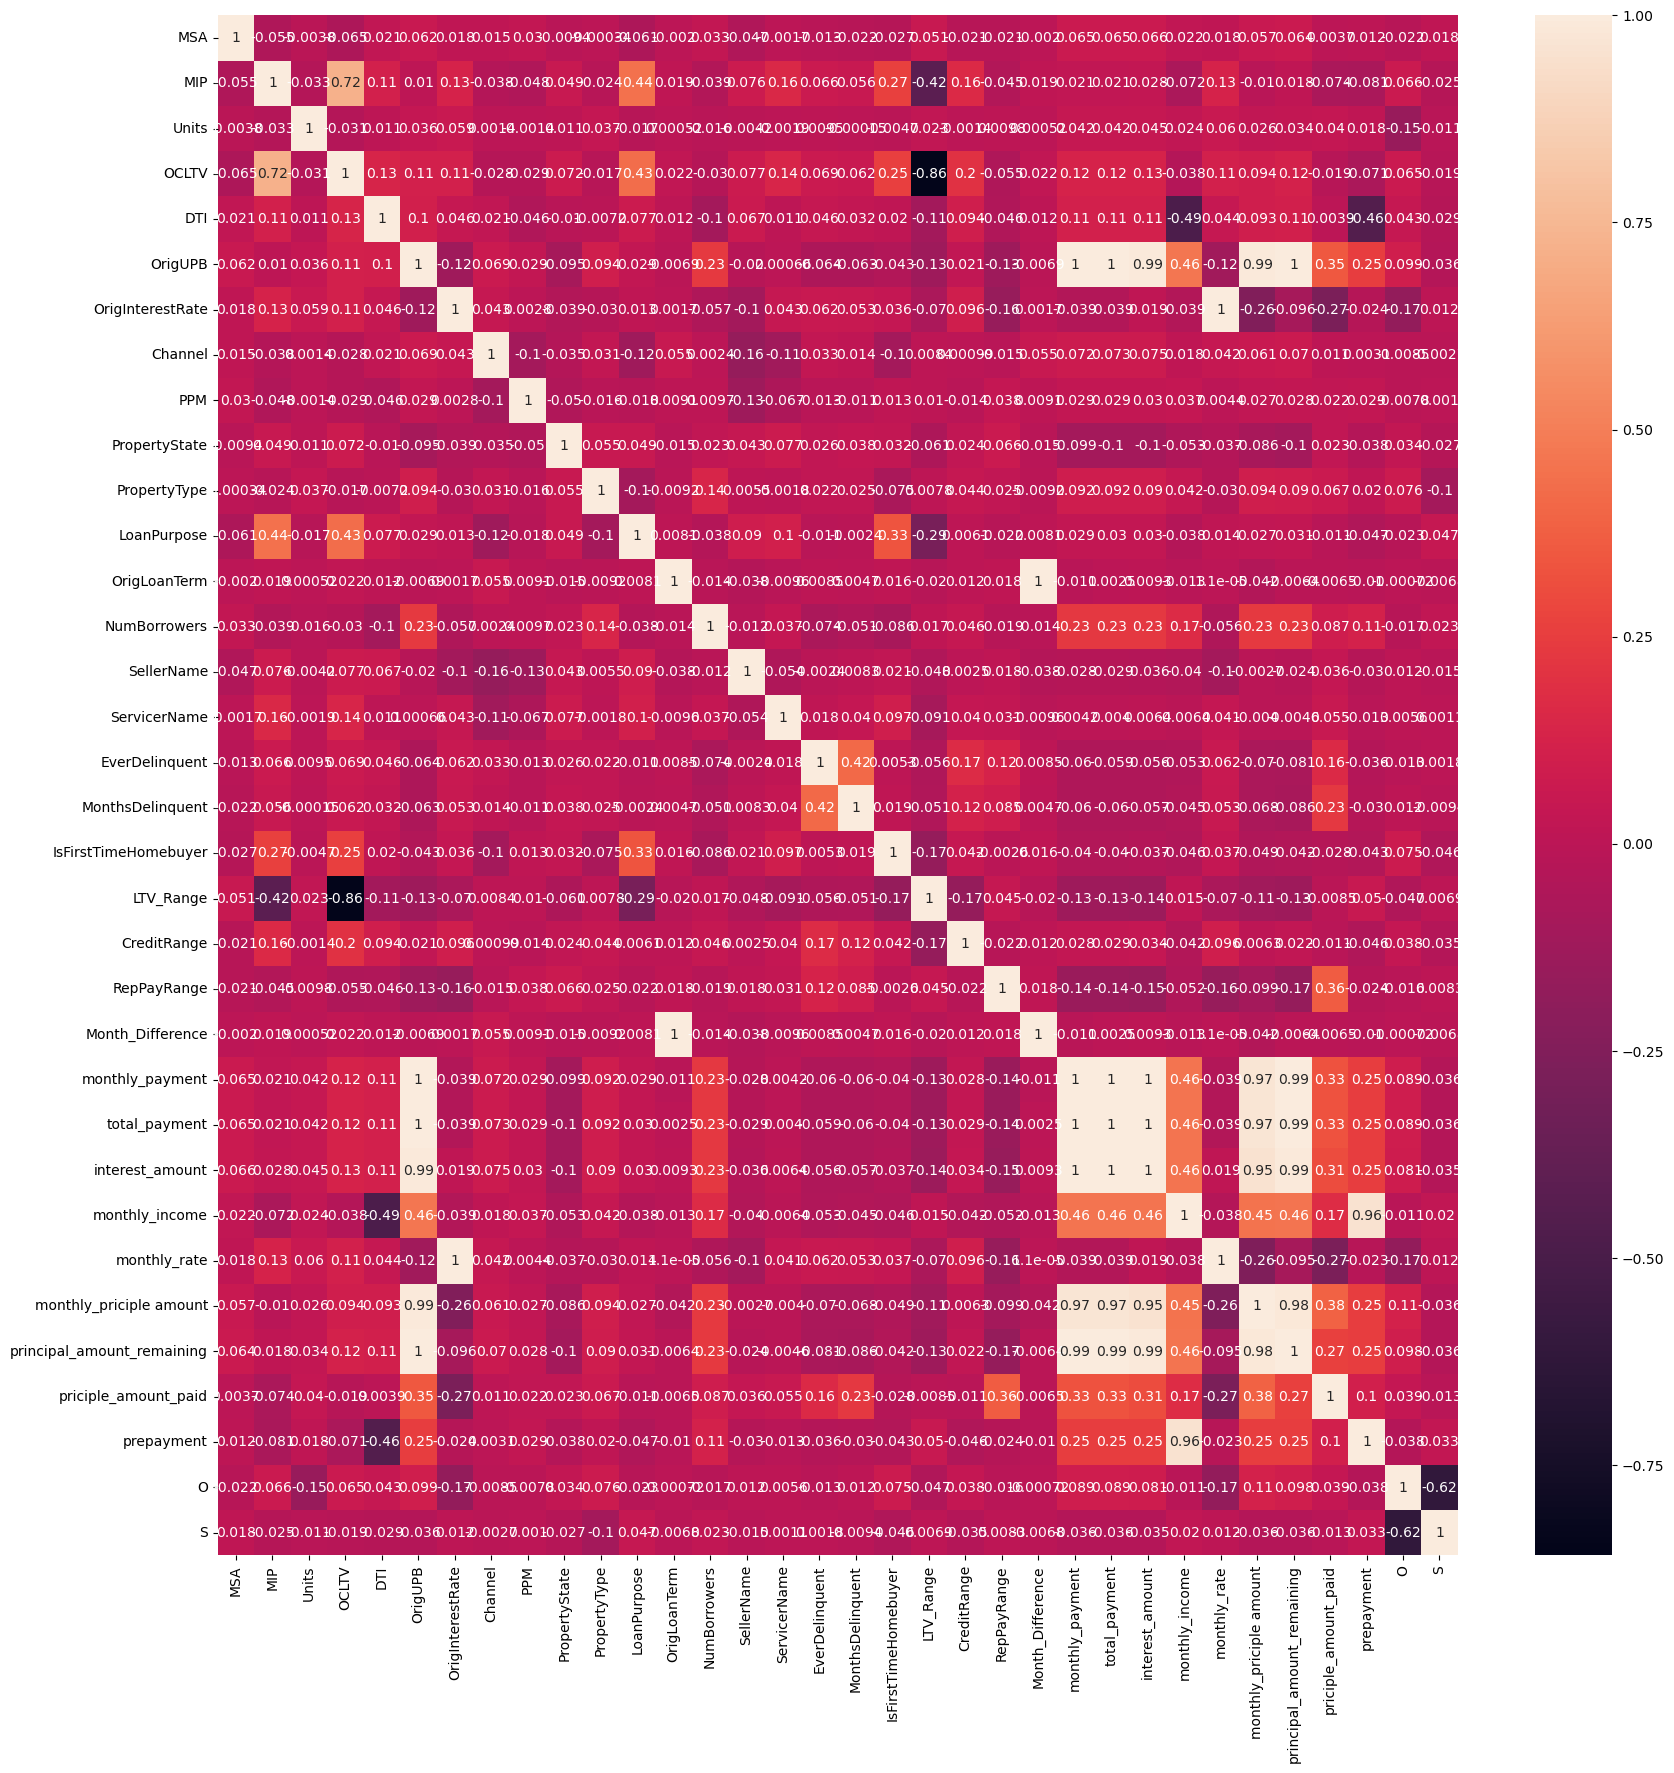

In [86]:
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True)

As from above correlation plot OrigLoanTerm and Month_Difference is Highly correlated so we have to remove one of the column


In [87]:
df.drop(['OrigLoanTerm'],axis=1, inplace=True)
df.drop(['OrigUPB'],axis=1, inplace=True)
df.drop(['OrigInterestRate'],axis=1, inplace=True)

In [88]:
x=df.drop("prepayment",axis=1)
y=df["prepayment"]

In [89]:
x

,MSA,MIP,Units,OCLTV,DTI,Channel,PPM,PropertyState,PropertyType,LoanPurpose,...,monthly_payment,total_payment,interest_amount,monthly_income,monthly_rate,monthly_priciple amount,principal_amount_remaining,priciple_amount_paid,O,S
0,16974,18,1,89,27,3,0,14,5,2,...,758.86,273189.60,156189.60,2800.0,0.0056,103.66,111609.68,5390.32,1,0
1,19740,0,1,73,17,2,0,5,5,1,...,688.95,248022.00,139022.00,4000.0,0.0054,100.35,94549.60,14450.40,1,0
2,29940,0,1,75,16,3,0,16,5,1,...,578.10,208116.00,120116.00,3600.0,0.0057,76.50,82874.50,5125.50,1,0
3,31084,0,1,76,14,2,0,4,5,1,...,1051.09,378392.40,218392.40,7500.0,0.0057,139.09,155131.85,4868.15,1,0
4,35644,0,1,78,18,2,0,31,5,1,...,734.35,264366.00,155366.00,4000.0,0.0059,91.25,104072.50,4927.50,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291445,19740,0,1,75,51,3,0,5,0,2,...,227.47,81889.20,50889.20,400.0,0.0067,19.77,29971.96,1028.04,0,0
291446,37964,0,1,60,32,2,0,38,5,1,...,598.77,215557.20,125557.20,1800.0,0.0058,76.77,89078.76,921.24,1,0
291448,42044,0,1,73,31,2,0,4,5,1,...,530.57,166068.41,79068.41,1700.0,0.0047,121.67,82376.54,4623.46,1,0
291449,37964,0,1,80,54,2,0,38,5,2,...,585.47,210769.20,122769.20,1000.0,0.0058,75.07,85597.76,2402.24,0,0


In [90]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Assuming you have your features (X) and target variable (y) ready
# Replace 'X' and 'y' with the actual names of your feature matrix and target array

# Create a Linear Regression model
model = LinearRegression()

# Create RFE with the Linear Regression model and specify the desired number of features
rfe = RFE(model, n_features_to_select=20)  # Change the 'n_features_to_select' as per your requirement

# Fit RFE on the data
rfe.fit(x, y)

# Get the selected features
selected_features = x.columns[rfe.support_]

# Print the selected features
print("Selected Features:", selected_features)


Selected Features: Index(['Units', 'OCLTV', 'DTI', 'Channel', 'PPM', 'PropertyType',
       'NumBorrowers', 'ServicerName', 'EverDelinquent',
       'IsFirstTimeHomebuyer', 'CreditRange', 'monthly_payment',
       'total_payment', 'interest_amount', 'monthly_income', 'monthly_rate',
       'principal_amount_remaining', 'priciple_amount_paid', 'O', 'S'],
      dtype='object')


In [91]:


# List of selected columns
selected_columns = ['Units', 'OCLTV', 'DTI', 'Channel', 'PPM', 'PropertyType',
       'NumBorrowers', 'ServicerName', 'EverDelinquent',
       'IsFirstTimeHomebuyer', 'CreditRange', 'monthly_payment',
       'total_payment', 'interest_amount', 'monthly_income', 'monthly_rate',
       'principal_amount_remaining', 'priciple_amount_paid', 'O', 'S']

# Create a new DataFrame with only the selected columns
new_dataset = x[selected_columns].copy()

# Display the new DataFrame
print(new_dataset)


        Units  OCLTV  DTI  Channel  PPM  PropertyType  NumBorrowers  \
0           1     89   27        3    0             5             2   
1           1     73   17        2    0             5             1   
2           1     75   16        3    0             5             2   
3           1     76   14        2    0             5             2   
4           1     78   18        2    0             5             2   
...       ...    ...  ...      ...  ...           ...           ...   
291445      1     75   51        3    0             0             1   
291446      1     60   32        2    0             5             2   
291448      1     73   31        2    0             5             1   
291449      1     80   54        2    0             5             2   
291450      1     47   29        2    0             5             2   

        ServicerName  EverDelinquent  IsFirstTimeHomebuyer  CreditRange  \
0                 17               0                     0            3 

In [92]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data['Variable'] = new_dataset.columns
vif_data['VIF'] = [variance_inflation_factor(new_dataset.values, i) for i in range(new_dataset.shape[1])]
print(vif_data)


C:\Users\PSPL\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


                      Variable           VIF
0                        Units  3.967808e+01
1                        OCLTV  3.196614e+01
2                          DTI  1.585233e+01
3                      Channel  2.893725e+01
4                          PPM  1.043803e+00
5                 PropertyType  1.497536e+01
6                 NumBorrowers  1.386637e+01
7                 ServicerName  3.810477e+00
8               EverDelinquent  1.357595e+00
9         IsFirstTimeHomebuyer  1.283277e+00
10                 CreditRange  2.961248e+00
11             monthly_payment  3.230364e+04
12               total_payment           inf
13             interest_amount           inf
14              monthly_income  5.264641e+00
15                monthly_rate  1.744986e+02
16  principal_amount_remaining           inf
17        priciple_amount_paid           inf
18                           O  4.744009e+01
19                           S  1.623750e+00


In [93]:
x1=new_dataset.drop(["total_payment","interest_amount","principal_amount_remaining","priciple_amount_paid"],axis=1)

In [94]:
vif_data = pd.DataFrame()
vif_data['Variable'] = x1.columns
vif_data['VIF'] = [variance_inflation_factor(x1.values, i) for i in range(x1.shape[1])]

# Display the VIF DataFrame
print(vif_data)

                Variable         VIF
0                  Units   37.515162
1                  OCLTV   31.565135
2                    DTI   15.697339
3                Channel   28.112485
4                    PPM    1.041982
5           PropertyType   14.794374
6           NumBorrowers   13.545044
7           ServicerName    3.784613
8         EverDelinquent    1.291045
9   IsFirstTimeHomebuyer    1.281747
10           CreditRange    2.946136
11       monthly_payment   11.764425
12        monthly_income    5.217667
13          monthly_rate  131.583971
14                     O   40.666432
15                     S    1.535045


In [95]:
x2=x1.drop(["monthly_rate"],axis=1)

In [96]:
vif_data = pd.DataFrame()
vif_data['Variable'] = x2.columns
vif_data['VIF'] = [variance_inflation_factor(x2.values, i) for i in range(x2.shape[1])]

# Display the VIF DataFrame
print(vif_data)

                Variable        VIF
0                  Units  28.444503
1                  OCLTV  28.122372
2                    DTI  14.886697
3                Channel  24.422989
4                    PPM   1.035235
5           PropertyType  14.434109
6           NumBorrowers  13.059161
7           ServicerName   3.742779
8         EverDelinquent   1.290428
9   IsFirstTimeHomebuyer   1.281572
10           CreditRange   2.944753
11       monthly_payment  11.483007
12        monthly_income   5.066182
13                     O  33.965967
14                     S   1.426927


In [97]:
x3=x2.drop(["O"],axis=1)

In [98]:
vif_data = pd.DataFrame()
vif_data['Variable'] = x3.columns
vif_data['VIF'] = [variance_inflation_factor(x3.values, i) for i in range(x3.shape[1])]

# Display the VIF DataFrame
print(vif_data)

                Variable        VIF
0                  Units  27.675310
1                  OCLTV  25.838231
2                    DTI  14.437920
3                Channel  22.553688
4                    PPM   1.033228
5           PropertyType  14.019586
6           NumBorrowers  12.774679
7           ServicerName   3.725462
8         EverDelinquent   1.290190
9   IsFirstTimeHomebuyer   1.279103
10           CreditRange   2.944719
11       monthly_payment  11.482879
12        monthly_income   5.014792
13                     S   1.030124


In [99]:
x4=x3.drop(["Units"],axis=1)

In [100]:
vif_data = pd.DataFrame()
vif_data['Variable'] = x4.columns
vif_data['VIF'] = [variance_inflation_factor(x4.values, i) for i in range(x4.shape[1])]

# Display the VIF DataFrame
print(vif_data)

                Variable        VIF
0                  OCLTV  24.233326
1                    DTI  13.746511
2                Channel  20.060922
3                    PPM   1.029820
4           PropertyType  13.387687
5           NumBorrowers  12.473155
6           ServicerName   3.699222
7         EverDelinquent   1.290026
8   IsFirstTimeHomebuyer   1.278950
9            CreditRange   2.944382
10       monthly_payment  11.454175
11        monthly_income   4.891752
12                     S   1.029668


In [101]:
x5=x4.drop(["OCLTV"],axis=1)

In [102]:
vif_data = pd.DataFrame()
vif_data['Variable'] = x5.columns
vif_data['VIF'] = [variance_inflation_factor(x5.values, i) for i in range(x5.shape[1])]

# Display the VIF DataFrame
print(vif_data)

                Variable        VIF
0                    DTI  12.639219
1                Channel  17.578426
2                    PPM   1.028652
3           PropertyType  12.991460
4           NumBorrowers  12.230722
5           ServicerName   3.535857
6         EverDelinquent   1.286812
7   IsFirstTimeHomebuyer   1.179010
8            CreditRange   2.844055
9        monthly_payment  11.398695
10        monthly_income   4.835866
11                     S   1.028535


In [103]:
x6=x5.drop(["Channel"],axis=1)

In [104]:
vif_data = pd.DataFrame()
vif_data['Variable'] = x6.columns
vif_data['VIF'] = [variance_inflation_factor(x6.values, i) for i in range(x6.shape[1])]
print(vif_data)

                Variable        VIF
0                    DTI  10.619665
1                    PPM   1.026083
2           PropertyType  11.519853
3           NumBorrowers  11.319396
4           ServicerName   3.528888
5         EverDelinquent   1.280849
6   IsFirstTimeHomebuyer   1.178989
7            CreditRange   2.835823
8        monthly_payment  11.396919
9         monthly_income   4.607884
10                     S   1.026483


In [105]:
x7=x6.drop(["PropertyType"],axis=1)

In [106]:
vif_data = pd.DataFrame()
vif_data['Variable'] = x7.columns
vif_data['VIF'] = [variance_inflation_factor(x7.values, i) for i in range(x7.shape[1])]
print(vif_data)

               Variable        VIF
0                   DTI   9.186891
1                   PPM   1.025955
2          NumBorrowers   9.368084
3          ServicerName   3.482986
4        EverDelinquent   1.274521
5  IsFirstTimeHomebuyer   1.178782
6           CreditRange   2.815951
7       monthly_payment  11.390082
8        monthly_income   4.436415
9                     S   1.019620


In [107]:
x8=x7.drop(["monthly_payment"],axis=1)

In [108]:
vif_data = pd.DataFrame()
vif_data['Variable'] = x8.columns
vif_data['VIF'] = [variance_inflation_factor(x8.values, i) for i in range(x8.shape[1])]
print(vif_data)

               Variable       VIF
0                   DTI  6.531095
1                   PPM  1.025145
2          NumBorrowers  8.963071
3          ServicerName  3.482547
4        EverDelinquent  1.271506
5  IsFirstTimeHomebuyer  1.178550
6           CreditRange  2.815689
7        monthly_income  2.763980
8                     S  1.016876


In [109]:
X=x8
Y=df["prepayment"]

In [110]:
scaler = StandardScaler()

In [111]:
scaler_fitX = scaler.fit_transform(X)

In [112]:
y_rescaled = scaler.fit_transform(Y.values.reshape(-1, 1))

In [113]:
X=pd.DataFrame(scaler_fitX, columns = X.columns)

In [114]:
Y = pd.DataFrame(y_rescaled, columns=['Rescaled_Target'])

In [115]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.25, random_state = 42)

In [116]:
model = LinearRegression()
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)

In [117]:

Y_train_pred = model.predict(X_train)
Y_test_pred = model.predict(X_test)

train_r2 = r2_score(Y_train, Y_train_pred)
test_r2 = r2_score(Y_test, Y_test_pred)

train_mse = mean_squared_error(Y_train, Y_train_pred)
test_mse = mean_squared_error(Y_test, Y_test_pred)

print("Training R-squared:", train_r2)
print("Testing R-squared:", test_r2)
print("Training Mean Squared Error:", train_mse)
print("Testing Mean Squared Error:", test_mse)

Training R-squared: 0.913663348133484
Testing R-squared: 0.9239715726603621
Training Mean Squared Error: 0.082467249232391
Testing Mean Squared Error: 0.08625003624134868


# Pipeliine

In [118]:
# #Import the required libraries:

# import numpy as np
# import pandas as pd
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LinearRegression
# from sklearn.preprocessing import StandardScaler
# from sklearn.pipeline import Pipeline
# import matplotlib.pyplot as plt


In [119]:
## Split the data into training and testing sets:

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [120]:
# #Create the pipeline:
# #The pipeline will consist of two main steps: data preprocessing (scaling the features) and model training (linear regression)

# # Define the steps in the pipeline
# steps = [
#     ('scaler', StandardScaler()),  # Standardize the features
#     ('regressor', LinearRegression())  # Linear Regression model
# ]

# # Create the pipeline
# pipeline = Pipeline(steps)


In [121]:
# #Train the model:

# pipeline.fit(X_train, y_train)
